import CSV file

In [2]:
import pandas as pd
df = pd.read_csv('customer_support_chatbot_dataset.csv')
df.head()

,ticket_id,created_at,company,category,status,customer_message
0,1,2024-01-01,TelcoA,Billing,Resolved,My bill is too high
1,2,2024-01-02,TelcoB,Network Issue,Pending,Internet is not working
2,3,2024-01-03,TelcoC,Account,Resolved,I want to update my account details
3,4,2024-01-04,TelcoA,Technical,Resolved,My router is not working
4,5,2024-01-05,TelcoB,Billing,Pending,Incorrect billing amount


import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data cleaning

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.drop_duplicates()
df.fillna('Unknown', inplace=True)


Analytics Function

In [5]:
def tickets_last_month():
    last_month = df['created_at'].max() - pd.DateOffset(months=1)
    return df[df['created_at'] >= last_month].shape[0]

def top_product_complaints():
    return df['category'].value_counts().head(5)

def tickets_by_company_chart():
    import matplotlib.pyplot as plt
    df['company'].value_counts().plot(kind='bar')
    plt.show()


Chatbot logic

In [6]:
def chatbot_response(user_input):
    user_input = user_input.lower()

    if 'last month' in user_input:
        return f"Tickets last month: {tickets_last_month()}"
    elif 'top product' in user_input:
        return f"Top categories:\n{top_product_complaints()}"
    elif 'chart' in user_input:
        tickets_by_company_chart()
        return "Here’s the chart of tickets by company"
    else:
        return "Sorry, I cannot answer that query yet."


Interactive chat

Welcome to Customer Support Analytics Chatbot!
Type 'exit' or 'quit' to end.

You: tickets last month
Bot: Tickets last month: 20
You: top product complaints
Bot: Top categories:
category
Billing          8
Network Issue    4
Account          4
Technical        4
Name: count, dtype: int64
You: tickets by company chart


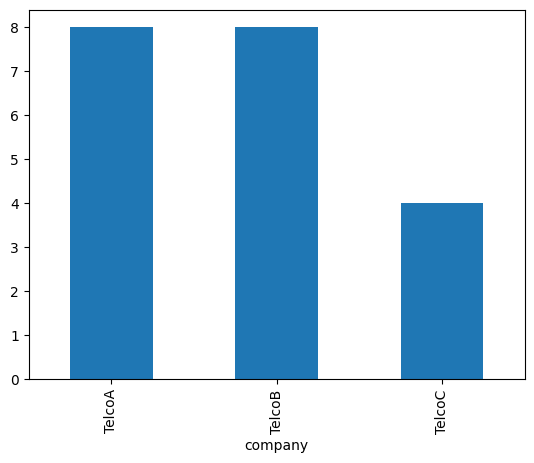

Bot: Here’s the chart of tickets by company


In [ ]:
print("Welcome to Customer Support Analytics Chatbot!")
print("Type 'exit' or 'quit' to end.\n")

while True:
    user_input = input("You: ")
    if user_input.lower() in ['exit', 'quit']:
        print("Bot: Goodbye! 👋")
        break
    response = chatbot_response(user_input)
    print("Bot:", response)